In [17]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from scipy.stats import zscore

In [36]:
df = pd.read_csv("Trucks.csv",index_col=0)
df.head()

,Freq,period,parked,light,collision
1,712,0,1,1,0
2,613,1,1,1,0
3,192,0,1,1,1
4,179,1,1,1,1
5,2557,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Freq       24 non-null     int64
 1   period     24 non-null     int64
 2   parked     24 non-null     int64
 3   light      24 non-null     int64
 4   collision  24 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [9]:
df.describe()

,Freq,period,parked,light,collision
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,1448.916667,0.500000,0.500000,0.333333,0.500000
std,2794.132578,0.510754,0.510754,0.481543,0.510754
min,39.000000,0.000000,0.000000,0.000000,0.000000
25%,188.750000,0.000000,0.000000,0.000000,0.000000
50%,536.500000,0.500000,0.500000,0.000000,0.500000
75%,994.750000,1.000000,1.000000,1.000000,1.000000
max,10749.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

Freq         0
period       0
parked       0
light        0
collision    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [18]:
df_scaled=df.apply(zscore)
df_scaled.head(5)

,Freq,period,parked,light,collision
1,-0.269410,-1.0,1.0,1.414214,-1.0
2,-0.305603,1.0,1.0,1.414214,-1.0
3,-0.459517,-1.0,1.0,1.414214,1.0
4,-0.464269,1.0,1.0,1.414214,1.0
5,0.405105,-1.0,-1.0,1.414214,-1.0


In [37]:
X = df.drop('collision',axis=1)
Y = df.pop('collision')

In [30]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.00,random_state=1,stratify = Y)

ValueError: test_size=0.0 should be either positive and smaller than the number of samples 24 or a float in the (0, 1) range

In [35]:
df['collision'].value_counts()
Y

1    -1.0
2    -1.0
3     1.0
4     1.0
5    -1.0
6    -1.0
7     1.0
8     1.0
9    -1.0
10   -1.0
11    1.0
12    1.0
13   -1.0
14   -1.0
15    1.0
16    1.0
17   -1.0
18   -1.0
19    1.0
20    1.0
21   -1.0
22   -1.0
23    1.0
24    1.0
Name: collision, dtype: float64

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24
 

AUC for the Training Data: 0.625


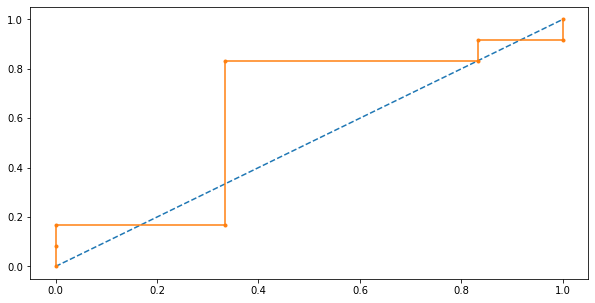

In [38]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)


# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X)



print('Classification Report of the training data:\n\n',metrics.classification_report(Y,pred_class_train),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X)


# calculate AUC
auc = metrics.roc_auc_score(Y,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)



#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')



In [23]:
X = df_scaled.drop('collision',axis=1)
Y = df_scaled.pop('collision')

In [24]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

Classification Report of the training data:

               precision    recall  f1-score   support

        -1.0       0.71      0.62      0.67         8
         1.0       0.67      0.75      0.71         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16
 

Classification Report of the test data:

               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         4
         1.0       0.43      0.75      0.55         4

    accuracy                           0.38         8
   macro avg       0.21      0.38      0.27         8
weighted avg       0.21      0.38      0.27         8
 

AUC for the Training Data: 0.750
AUC for the Test Data: 0.312


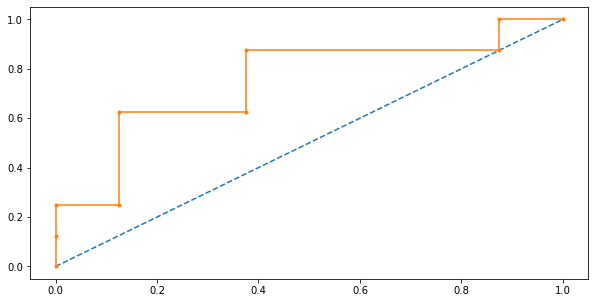

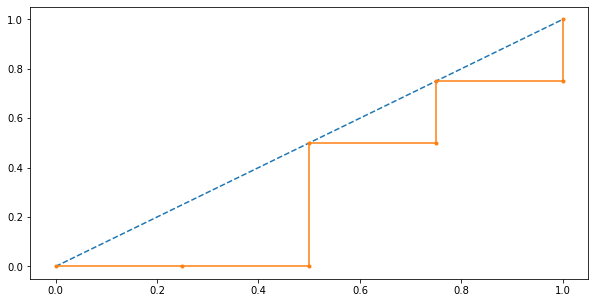

In [25]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)


print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.figure(figsize=(10,5))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')